In [112]:
from matplotlib import pyplot as plt
import pandas as pd
import sqlite3
import numpy as np
import networkx as nx

In [94]:
# setting up the database connection
con = sqlite3.connect('hw03_data/hw3.db')

## Question 1

In [95]:
# total gene disease associations catalogued
query = "SELECT COUNT(last_year) FROM disgenet WHERE disgenet.last_year >= 1960"
dd = pd.read_sql_query(query, con)
dd

,COUNT(last_year)
0,1135044


In [96]:
# total papers published between 1960 and present
query = "SELECT SUM(num_pubs) FROM disgenet WHERE disgenet.last_year >= 1960"
dd = pd.read_sql_query(query, con)
dd

,SUM(num_pubs)
0,3057889


In [97]:
# cumulative sum of published papers, excluding NA values for last_year
query = """
SELECT last_year, SUM(SUM(num_pubs)) OVER (ORDER BY last_year) AS sum_papers
FROM disgenet
WHERE last_year <> "NA"
GROUP BY last_year
"""
cumulative_papers = pd.read_sql_query(query, con)
cumulative_papers

,last_year,sum_papers
0,1959,1
1,1962,5
2,1966,7
3,1967,9
4,1968,12
5,1969,15
6,1970,19
7,1971,40
8,1972,61
9,1973,81


In [98]:
# cumulative sum of associations, exclusing NA values for last_year
query = """SELECT last_year, SUM(COUNT(num_pubs)) OVER (ORDER BY last_year) AS sum_associations
FROM disgenet
WHERE last_year <> "NA"
GROUP BY last_year"""
cumulative_associations = pd.read_sql_query(query, con)
cumulative_associations

,last_year,sum_associations
0,1959,1
1,1962,5
2,1966,7
3,1967,9
4,1968,12
5,1969,15
6,1970,19
7,1971,38
8,1972,57
9,1973,73


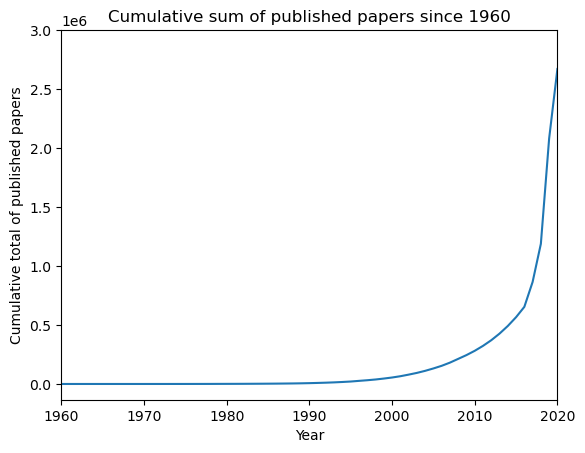

In [99]:
plt.plot(cumulative_papers["last_year"], cumulative_papers["sum_papers"])
plt.xlabel("Year")
plt.ylabel("Cumulative total of published papers")
plt.title("Cumulative sum of published papers since 1960")
plt.xlim(1960, 2020)
plt.yticks(np.arange(0, 3500000, 500000))
plt.show()

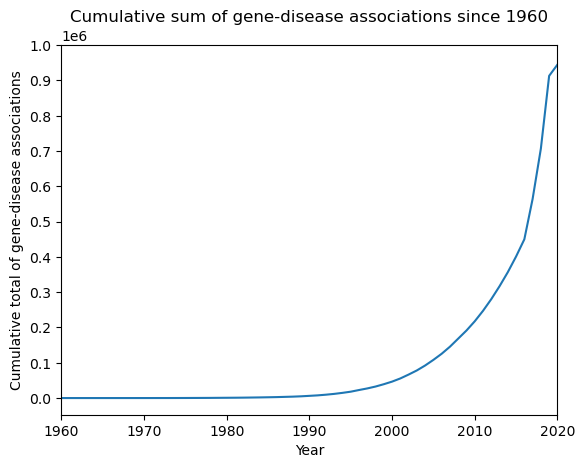

In [100]:
plt.plot(cumulative_associations["last_year"], cumulative_associations["sum_associations"])
plt.xlabel("Year")
plt.ylabel("Cumulative total of gene-disease associations")
plt.title("Cumulative sum of gene-disease associations since 1960")
plt.xlim(1960, 2020)
plt.yticks(np.arange(11) * 100000)
plt.show()

The Human Genome Project, which finished in 2003, was a proof of concept that we are able to sequence the entire human genome. Analogous to how computational power continued to increase throughout the year, we have been able to decrease the time it takes to fully sequence a genome. Addionally, as we gain more information on what parts of a genome are pertinent in certain diseases, we now only have to sequence parts of the genome for the analysis of a given disease. 

This trend can be clearly seen through the two cumulative sum graphs above, which both depict a an exponential increase in research output and associations after the completion of the Human Genome Project in 2003 and the decade after, presumably due to the decreased cost and labour associated with sequencing human genomes.

## Problem 2

In [101]:
# top 10 genes with the greatest number of associations
query = """SELECT gene_symbol, gene_name, SUM(num_pubs) as num_pubs, COUNT(gene_id) AS num_assoc
FROM disgenet
GROUP BY gene_id
ORDER BY COUNT(gene_id) DESC
LIMIT 10"""
dd = pd.read_sql_query(query, con)
dd

,gene_symbol,gene_name,num_pubs,num_assoc
0,TNF,tumor necrosis factor,21889,2724
1,TP53,tumor protein p53,49257,2494
2,IL6,interleukin 6,15512,2367
3,VEGFA,vascular endothelial growth factor A,18185,1899
4,IL1B,interleukin 1 beta,9276,1801
5,IL10,interleukin 10,8273,1679
6,TGFB1,transforming growth factor beta 1,8375,1558
7,IFNG,interferon gamma,6718,1519
8,PIK3CA,"phosphatidylinositol-4,5-bisphosphate 3-kinase...",13746,1511
9,CRP,C-reactive protein,8314,1483


In [102]:
query = """SELECT disease_name, gene_symbol, gene_name, SUM(num_pubs) as num_pubs, COUNT(gene_id) AS num_assoc
FROM disgenet
WHERE disease_type <> 'group'
GROUP BY disease_name
ORDER BY COUNT(gene_id) DESC
LIMIT 10"""
dd = pd.read_sql_query(query, con)
dd


,disease_name,gene_symbol,gene_name,num_pubs,num_assoc
0,Malignant neoplasm of breast,NAT1,N-acetyltransferase 1,57731,6941
1,Breast Carcinoma,NAT1,N-acetyltransferase 1,57145,6776
2,Tumor Cell Invasion,A2M,alpha-2-macroglobulin,44915,6626
3,Neoplasm Metastasis,A2M,alpha-2-macroglobulin,43596,6385
4,Carcinogenesis,NAT1,N-acetyltransferase 1,37214,6243
5,Liver carcinoma,A1BG,alpha-1-B glycoprotein,29369,5725
6,Colorectal Carcinoma,NAT1,N-acetyltransferase 1,28072,5473
7,Malignant neoplasm of prostate,A2M,alpha-2-macroglobulin,27691,4502
8,Prostate carcinoma,A2M,alpha-2-macroglobulin,26813,4388
9,Malignant neoplasm of lung,A2M,alpha-2-macroglobulin,19312,4173


## Problem 3

In [103]:
# degree distribution for genes
query = """SELECT num_assoc AS degree, COUNT(*) AS frequency
FROM ( SELECT gene_symbol, gene_name, SUM(num_pubs) as num_pubs, COUNT(gene_id) AS num_assoc
FROM disgenet
GROUP BY gene_id
ORDER BY COUNT(gene_id) DESC)
GROUP BY num_assoc
ORDER BY frequency DESC"""
gene_degree = pd.read_sql_query(query, con)
gene_degree

,degree,frequency
0,1,2340
1,2,1536
2,3,1064
3,4,919
4,5,779
...,...,...
628,313,1
629,312,1
630,267,1
631,263,1


In [104]:
# degree distribution for disease
query = """SELECT num_assoc AS degree, COUNT(*) AS frequency
FROM ( SELECT disease_name, gene_symbol, gene_name, SUM(num_pubs) AS num_pubs, COUNT(gene_id) AS num_assoc
FROM disgenet
WHERE disease_type <> 'group'
GROUP BY disease_name
ORDER BY COUNT(gene_id) DESC )
GROUP BY num_assoc 
ORDER BY frequency DESC"""
disease_degree = pd.read_sql_query(query, con)
disease_degree

,degree,frequency
0,1,9349
1,2,3663
2,3,2148
3,4,1474
4,5,1140
...,...,...
718,246,1
719,238,1
720,229,1
721,214,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


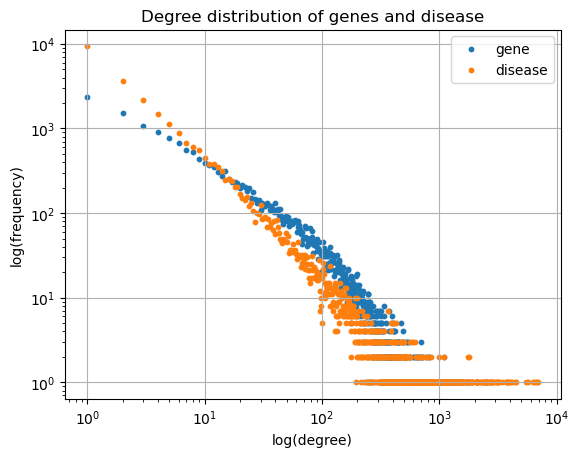

In [105]:
plt.scatter(gene_degree["degree"], gene_degree["frequency"], s=10)
plt.scatter(disease_degree["degree"], disease_degree["frequency"], s=10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log(degree)")
plt.ylabel("log(frequency)")
plt.title("Degree distribution of genes and disease")
plt.legend()
plt.grid()
plt.legend(["gene", "disease"])
plt.show()

## Problem 4

In [106]:
# identifying the genes that are strongly associated with alzheimer's disease
query = """SELECT gene_symbol, gene_name, disease_name, EI, num_pubs
FROM disgenet
WHERE disease_name LIKE "%alzheimer%"
AND EI >= 0.667
AND num_pubs >= 11
ORDER BY num_pubs DESC
LIMIT 10"""
dd = pd.read_sql_query(query, con)
dd

,gene_symbol,gene_name,disease_name,EI,num_pubs
0,APOE,apolipoprotein E,Alzheimer's Disease,0.9461,3088
1,APP,amyloid beta precursor protein,Alzheimer's Disease,0.9810,2615
2,MAPT,microtubule associated protein tau,Alzheimer's Disease,0.9900,1003
3,PSEN1,presenilin 1,Alzheimer's Disease,0.9707,703
4,BACE1,beta-secretase 1,Alzheimer's Disease,0.9852,490
5,APOE,apolipoprotein E,"Alzheimer Disease, Late Onset",0.9559,433
6,ACHE,acetylcholinesterase (Cartwright blood group),Alzheimer's Disease,0.9845,390
7,BCHE,butyrylcholinesterase,Alzheimer's Disease,0.9621,348
8,PSEN1,presenilin 1,Familial Alzheimer Disease (FAD),0.9708,308
9,CSF2,colony stimulating factor 2,Alzheimer's Disease,0.9660,294


## Problem 5

In [107]:
query = """
SELECT gene_symbol, DSI, DPI, EI, num_pubs
FROM disgenet
WHERE disease_name LIKE "%alzheimer%"
AND EI >= 0.667
AND num_pubs >= 11
ORDER BY num_pubs DESC"""
alz = pd.read_sql_query(query, con)
alz

,gene_symbol,DSI,DPI,EI,num_pubs
0,APOE,0.338,0.962,0.9461,3088
1,APP,0.422,0.846,0.9810,2615
2,MAPT,0.445,0.923,0.9900,1003
3,PSEN1,0.469,0.846,0.9707,703
4,BACE1,0.559,0.769,0.9852,490
...,...,...,...,...,...
351,MS4A4A,0.722,0.308,1.0000,11
352,CDCA5,0.563,0.808,1.0000,11
353,MIR34A,0.421,0.846,1.0000,11
354,LINC01672,0.462,0.846,1.0000,11


In [108]:
query = """SELECT gene_symbol, DSI, DPI, disease_name, EI, num_pubs
FROM disgenet
WHERE gene_symbol = "CALHM1"
AND disease_name LIKE "%alzheimer%"
AND EI >= 0.667
AND num_pubs >= 11"""
calhm1 = pd.read_sql_query(query, con)
calhm1

,gene_symbol,DSI,DPI,disease_name,EI,num_pubs
0,CALHM1,0.769,0.269,Alzheimer's Disease,0.8261,24


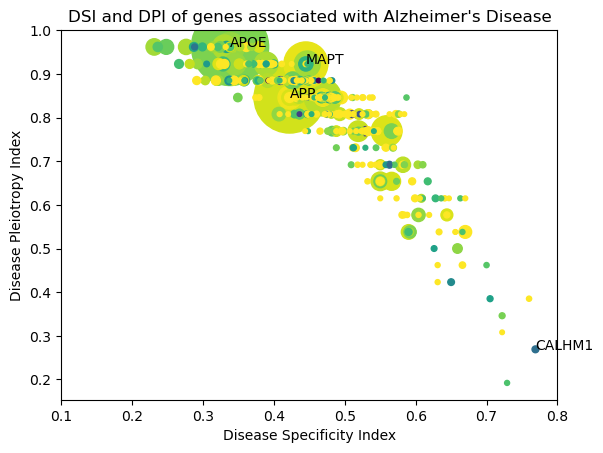

In [109]:
plt.scatter(alz.DSI, alz.DPI, c=alz.EI, s=alz.num_pubs, cmap='viridis')
plt.xlabel("Disease Specificity Index")
plt.ylabel("Disease Pleiotropy Index")
plt.title("DSI and DPI of genes associated with Alzheimer's Disease")
plt.text(0.338, 0.962, "APOE")
plt.text(0.422, 0.846, "APP")
plt.text(0.445, 0.923, "MAPT")
plt.text(0.769, 0.269, "CALHM1")
plt.yticks(np.arange(2, 11) / 10)
plt.xticks(np.arange(1, 9) / 10)
plt.show()

## Problem 6

In [110]:
query = """SELECT DISTINCT go_id, qualifier, go_term, gene_symbol, COUNT (*) as genes_involved
FROM disgenet d JOIN go_human gh USING (gene_id)
WHERE disease_name LIKE "%alzheimer%"
AND EI >= 0.667
AND num_pubs >= 11
GROUP BY go_id
ORDER BY genes_involved DESC"""
dd = pd.read_sql_query(query, con)
dd

,go_id,qualifier,go_term,gene_symbol,genes_involved
0,GO:0005515,enables,protein binding,A2M,318
1,GO:0005886,located_in,plasma membrane,ABCA1,317
2,GO:0005829,located_in,cytosol,ACTB,249
3,GO:0005737,is_active_in,cytoplasm,ACTB,243
4,GO:0005634,located_in,nucleus,SERPINA3,234
...,...,...,...,...,...
4930,GO:0000083,involved_in,regulation of transcription involved in G1/S t...,CDK5,1
4931,GO:0000049,enables,tRNA binding,HSD17B10,1
4932,GO:0000028,involved_in,ribosomal small subunit assembly,RPSA,1
4933,GO:0000015,part_of,phosphopyruvate hydratase complex,ENO2,1


The biological processes that these Alzheimer's linked genes most frequently involved in are protein binding, cell regulation, cell transport and gene expression. 

## Problem 7

In [111]:
query = """SELECT disease_name, COUNT(*) as genes_involved
FROM disgenet
WHERE disease_name NOT LIKE "%alzheimer%"
-- filtering for the genes that are strongly associated to alzheimers
AND gene_symbol IN (
	SELECT gene_symbol
	FROM disgenet
	WHERE disease_name LIKE "%alzheimer%"
	AND EI >= 0.667
	AND num_pubs >= 11
	AND disease_type <> "group"
	ORDER BY num_pubs DESC )
AND EI >= 0.667
AND num_pubs >= 11
AND disease_type <> "group"
GROUP BY disease_name
ORDER BY genes_involved DESC
LIMIT 10"""
dd = pd.read_sql_query(query, con)
dd

,disease_name,genes_involved
0,Malignant neoplasm of breast,124
1,Breast Carcinoma,123
2,Neoplasm Metastasis,109
3,Tumor Cell Invasion,101
4,Liver carcinoma,97
5,Carcinogenesis,95
6,Parkinson Disease,81
7,Atherosclerosis,78
8,"Diabetes Mellitus, Non-Insulin-Dependent",77
9,Obesity,76


## Problem 8

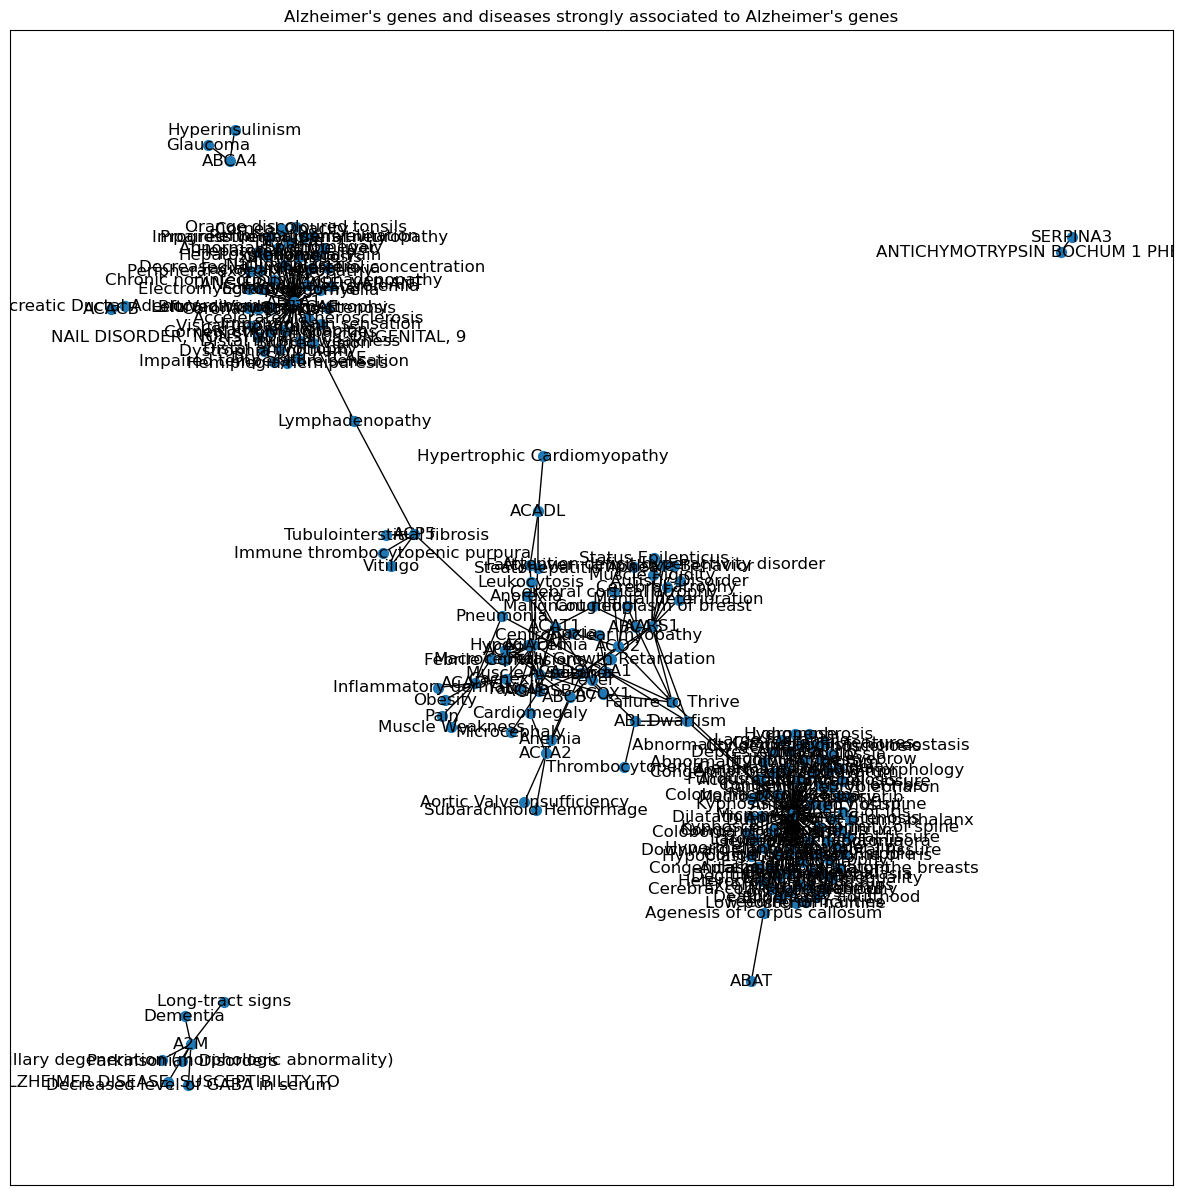

In [143]:
# I think the assignment question was somewhat vague, my interpretation of it is filter the entire database and keep entries that either have the Alzheimer genes found before, or the diseases associated with those genes, sorted by the number of publications. 

query = """SELECT disease_name, gene_symbol
FROM disgenet
WHERE disease_name IN (
	-- top 10 alzheimer's related diseases
	SELECT disease_name
	FROM disgenet
	WHERE disease_name NOT LIKE "%alzheimer%"
	-- filtering for the genes that are strongly associated to alzheimers
	AND gene_symbol IN (
		SELECT gene_symbol
		FROM disgenet
		WHERE disease_name LIKE "%alzheimer%"
		AND EI >= 0.667
		AND num_pubs >= 11
		AND disease_type <> "group"
		ORDER BY num_pubs DESC )
	AND EI >= 0.667
	AND num_pubs >= 11
	AND disease_type <> "group"
	GROUP BY disease_name
	ORDER BY COUNT(*) DESC )
OR gene_symbol IN (
	-- alzheimer genes
	SELECT gene_symbol
	FROM disgenet
	WHERE disease_name LIKE "%alzheimer%"
	AND EI >= 0.667
	AND num_pubs >= 11
	AND disease_type <> "group"
	ORDER BY num_pubs DESC )
ORDER BY num_pubs
LIMIT 200"""
net = pd.read_sql_query(query, con)
plt.figure(figsize=(15,15), dpi=100)
plt.title("Alzheimer's genes and diseases strongly associated to Alzheimer's genes")
G = nx.from_pandas_edgelist(net, 'gene_symbol', 'disease_name', create_using=nx.Graph())
nx.draw_networkx(G, with_labels=True, node_size=50)


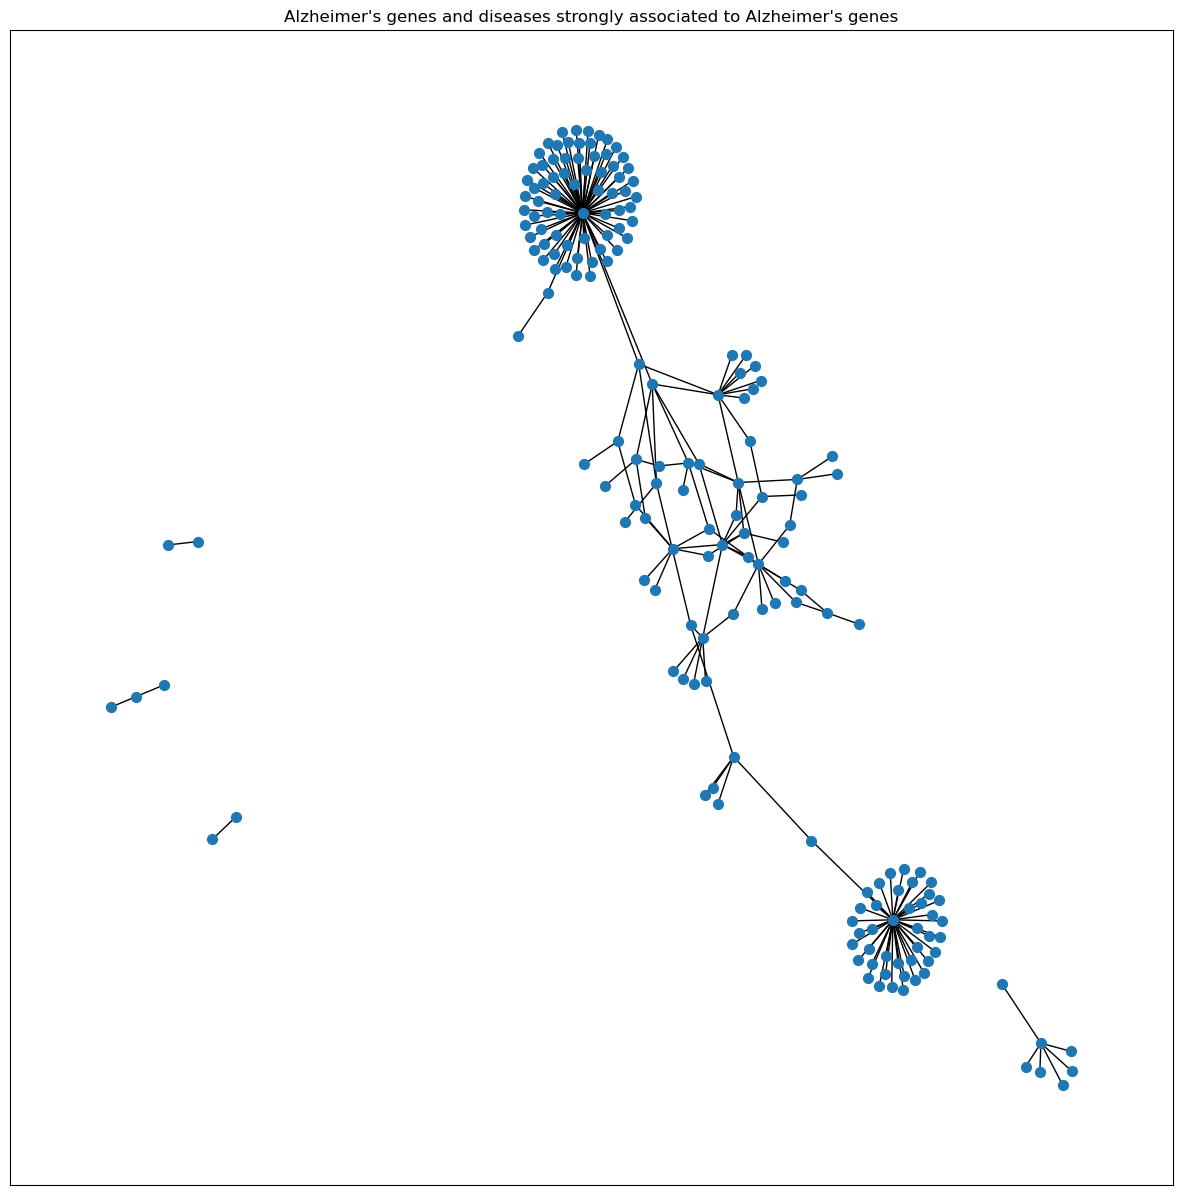

In [147]:
# a version without the text to see the structure of the graph better
plt.figure(figsize=(15,15), dpi=100)
plt.title("Alzheimer's genes and diseases strongly associated to Alzheimer's genes")
G = nx.from_pandas_edgelist(net, 'gene_symbol', 'disease_name', create_using=nx.Graph())
nx.draw_networkx(G, with_labels=False, node_size=50)

## Open Research Initiative

The objective is to look at the genes that correlate to cancer, with the ultimate goal of determining if different types of cancer are correlated to different genes

In [128]:
# query to get all genes strongly associated with cancer
# narrowed conditions to EI >= 0.9 and num_pubs >= 40 to have a more selective list of around 400 genes
query = """SELECT disease_name, gene_symbol, EI, DSI, COUNT(*) as num_associations
FROM disgenet
WHERE (disease_name LIKE "%carcinoma%"
OR disease_name LIKE "%cancer%"
OR disease_name LIKE "%lymphoma"
OR disease_name LIKE "%myeloma%"
OR disease_name LIKE "%sarcoma%"
OR disease_name LIKE "%metastatic%"
OR disease_name LIKE "%leukemia%"
OR disease_name LIKE "%melanoma%" )
AND EI >= 0.9
AND num_pubs >= 40
AND disease_type <> "group"
GROUP BY gene_symbol
ORDER BY num_associations DESC
LIMIT 50"""
dd = pd.read_sql_query(query, con)
dd

,disease_name,gene_symbol,EI,DSI,num_associations
0,Acute Erythroblastic Leukemia,TP53,0.9167,0.236,147
1,Adenocarcinoma Of Esophagus,EGFR,1.0000,0.295,70
2,Acute lymphocytic leukemia,PIK3CA,1.0000,0.292,69
3,Acute leukemia,CDKN2A,1.0000,0.300,67
4,Acute Erythroblastic Leukemia,ERBB2,1.0000,0.328,63
5,Acute lymphocytic leukemia,PIK3CD,1.0000,0.319,61
6,Acute leukemia,BCL2,0.9333,0.291,60
7,Acute lymphocytic leukemia,PIK3CG,1.0000,0.320,58
8,Acute lymphocytic leukemia,PIK3CB,1.0000,0.322,58
9,Adenocarcinoma of lung (disorder),VEGFA,0.9231,0.266,54


According to Healthline, the 5 most common cancer types are:

1. Breast Cancer
2. Lung Cancer 
3. Prostate Cancer
4. Colon and Rectal Cancer
5. Melanoma

In the following query, I roughly assign all rows as either one of the top five cancer types, depending on the disease_name, or as N/A for all other types of cancer not included and other diseases.

I follow the same criterion as above for determining the "reliability" of an association, by EI >= 0.9 and by num_pubs >= 40. 

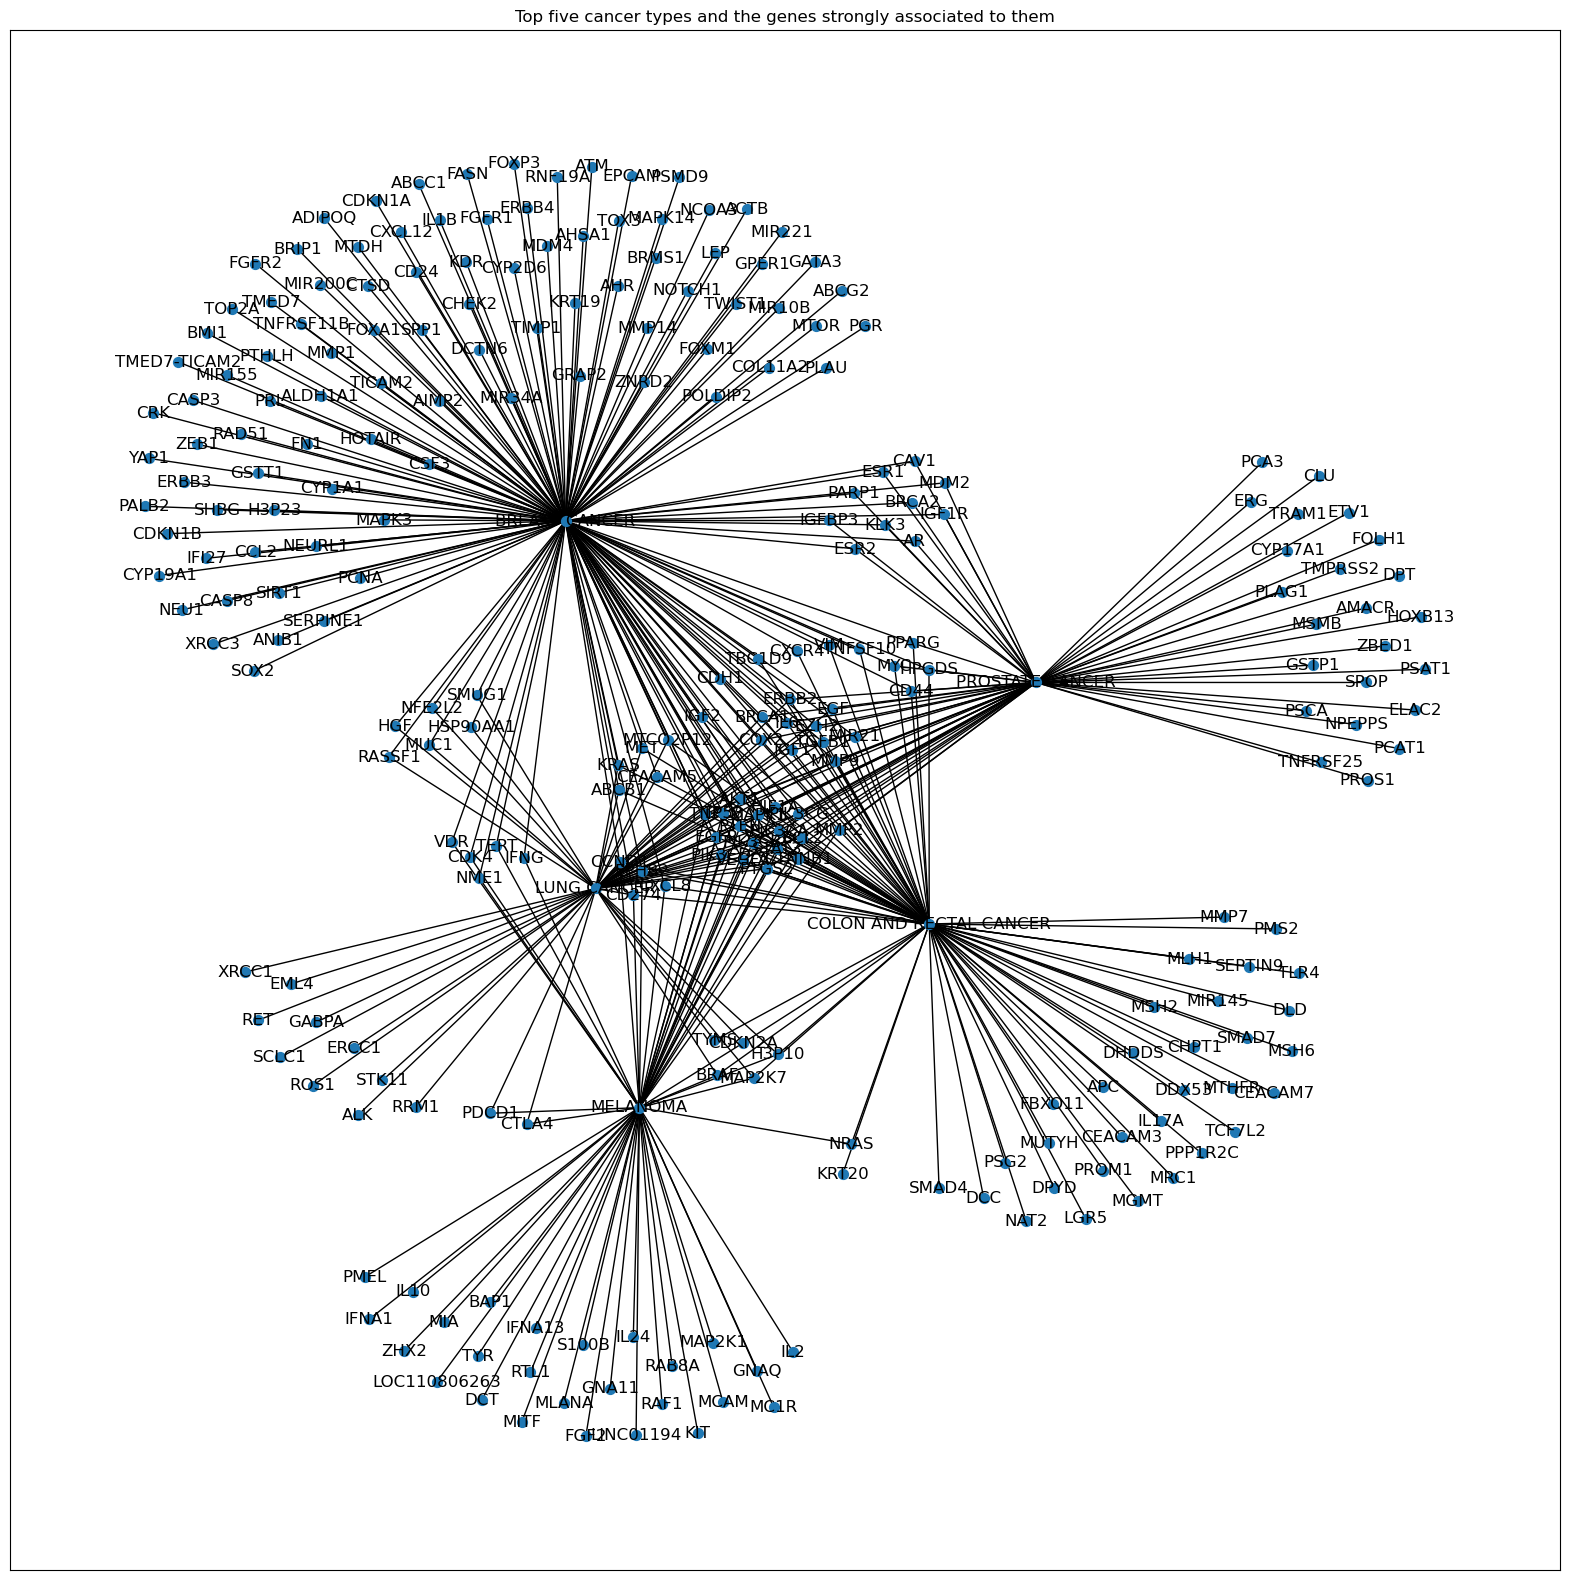

In [148]:
query = """SELECT disease_name, gene_symbol, EI, num_pubs, CASE
  WHEN (disease_name LIKE "%breast cancer%" 
  OR disease_name LIKE "%breast carcinoma%" 
  OR disease_name LIKE "%breast neoplasms%")
  THEN 'BREAST CANCER'
  WHEN (disease_name LIKE "%lung cancer%" 
  OR disease_name LIKE "%lung carcinoma%"
  OR disease_name LIKE "%lung neoplasm%")
  THEN 'LUNG CANCER'
  WHEN (disease_name LIKE "%prostate cancer%" 
  OR disease_name LIKE "%prostate carcinoma%") 
  THEN 'PROSTATE CANCER'
  WHEN (disease_name LIKE "%rectal carcinoma%" 
  OR disease_name LIKE "%colon carcinoma%"
  OR disease_name LIKE "%rectal neoplasm%"
  OR disease_name LIKE "%rectal cancer%")
  THEN 'COLON AND RECTAL CANCER'
  WHEN (disease_name LIKE "%lung cancer%" 
  OR disease_name LIKE "%lung neoplasm%"
  OR disease_name LIKE "%lung carcinoma%") 
  THEN 'LUNG CANCER'
  WHEN (disease_name LIKE "%melanoma%")
  THEN 'MELANOMA'
  ELSE 'N/A'
END AS cancer_type FROM disgenet
WHERE cancer_type <> "N/A"
AND EI >= 0.9
AND num_pubs >= 40
"""
net = pd.read_sql_query(query, con)
plt.figure(figsize=(20, 20), dpi=100)
plt.title("Top five cancer types and the genes strongly associated to them")
G = nx.from_pandas_edgelist(net, 'cancer_type', 'gene_symbol', create_using=nx.Graph())
nx.draw_networkx(G, with_labels=True, node_size=50)

From the graph produced, it is clear not all cancer types are strongly associated to the same genes. In other words, though all broadly categorized under the term "cancer", the different types of cancer displayed in this graph are each strongly associated to a subgroup of genes that mostly does not overlap with the genes associated with another type of cancer. 

An exception to this conclusion is perhaps lung cancer, which visually has more lines attaching it to the center of the graph (the cluster of genes associated with most or all cancers) than to the outskirts. 